In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
np.random.seed(42)

In [2]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [3]:
df.action.value_counts()

view      3260
enroll     814
Name: action, dtype: int64

In [4]:
# Get dataframe with all records from control group
control_df = df[df.group == 'control']

# Compute click through rate for control group
control_ctr = control_df[control_df.action=='enroll'].id.nunique() / control_df[control_df.action=='view'].id.nunique()

# Display click through rate
control_ctr

0.2364438839848676

In [5]:
# Get dataframe with all records from experiment group
experiment_df = df[df.group == 'experiment']

# Compute click through rate for experiment group
experiment_ctr = experiment_df[experiment_df.action=='enroll'].id.nunique() / experiment_df[experiment_df.action=='view'].id.nunique()

# Display click through rate
experiment_ctr

0.2668693009118541

In [6]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.030425416926986526

In [7]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []

for _ in range(10000):
#     bootsample = df.sample(200, replace=True)
    bootsample = df.sample(df.shape[0], replace=True)
    
    # subset the sample on the group
    control_df = bootsample[bootsample.group == 'control']
    experiment_df = bootsample[bootsample.group == 'experiment']
    
    # calculate the ctr of both groups
    control_ctr = control_df[control_df.action=='enroll'].id.nunique() / control_df[control_df.action=='view'].id.nunique()
    experiment_ctr = experiment_df[experiment_df.action=='enroll'].id.nunique() / experiment_df[experiment_df.action=='view'].id.nunique()
    
    # store the differences
    diffs.append(experiment_ctr - control_ctr)

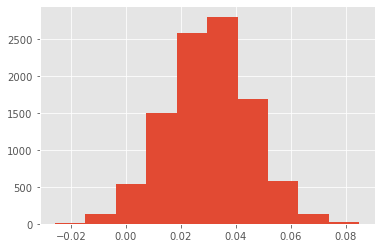

In [8]:
# Convert diffs to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);

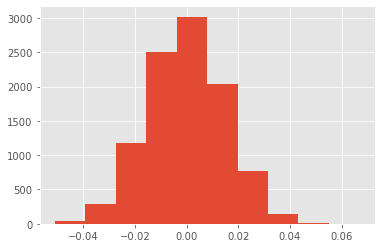

In [9]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, np.std(diffs), 10000)

# Plot the null distribution
plt.hist(null_vals);

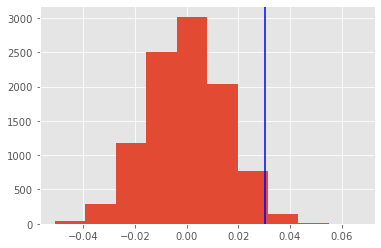

In [10]:
# Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(x = obs_diff, color = "blue")

In [11]:
# Compute p-value
(null_vals > obs_diff).mean()

0.0188

**alpha = 0.01 or 1%**  
Results show that the statistic came from the null distribution.  
We fail to reject the null.